#DESCRIBING SEGMENTS -Number of EV charging Stations on National Highways

In [88]:
#step :1 LOAD DATASET

In [ ]:
import pandas as pd

In [3]:
data = pd.read_csv("Number of EV charging Stations on National Highways.csv")
data.head()

,Sl. No.,State/UTs,Number of EV charging Stations on National Highways
0,1,Andaman and Nicobar Islands,1
1,2,Andhra Pradesh,249
2,3,Arunachal Pradesh,30
3,4,Assam,147
4,5,Bihar,96


In [5]:
data.tail()

,Sl. No.,State/UTs,Number of EV charging Stations on National Highways
29,30,Tripura,24
30,31,Uttar Pradesh,577
31,32,Uttarakhand,79
32,33,West Bengal,208
33,Grand Total,Grand Total,5293


In [7]:
data.isnull().sum()

Sl. No.                                                0
State/UTs                                              0
Number of EV charging Stations on National Highways    0
dtype: int64

In [9]:
data.describe()

,Number of EV charging Stations on National Highways
count,34.000000
mean,311.352941
std,897.689961
min,1.000000
25%,27.750000
50%,106.000000
75%,244.500000
max,5293.000000


In [ ]:
#Step 2: Develop a Complete Picture of Market Segments

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [15]:
# Preprocessing: Select relevant numeric columns for clustering
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numeric_columns])
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['segment'] = kmeans.fit_predict(scaled_data)

# Check segment distribution
print(data['segment'].value_counts())

C:\Users\Welcome\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


segment
0    29
2     4
1     1
Name: count, dtype: int64


In [29]:
print(data.columns)

Index(['Sl. No.', 'State/UTs',
       'Number of EV charging Stations on National Highways', 'segment'],
      dtype='object')


In [17]:
#Step 3: Visualizations to Describe Market Segments

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

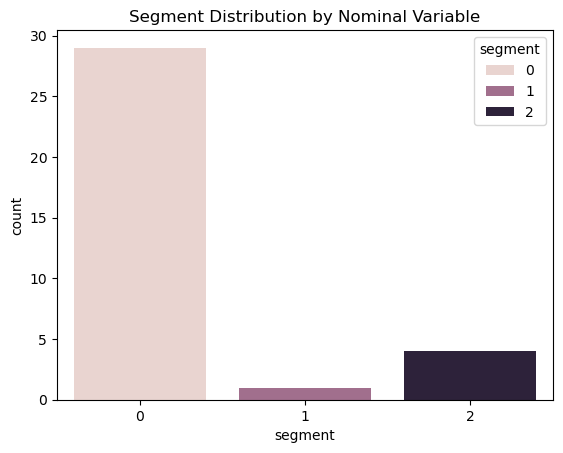

In [33]:
#count plot for a nominal variable by segments
sns.countplot(x='segment', hue='segment', data=data)
plt.title("Segment Distribution by Nominal Variable")
plt.show()


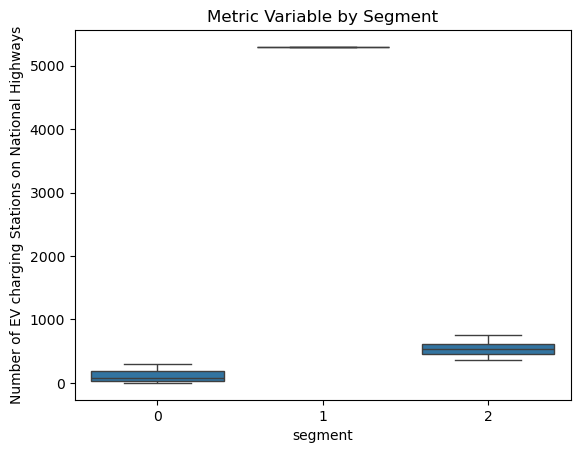

In [43]:
#Metric Variables:VISUALIZATION BOXPLOT FOR METRIC VARIABLE BY SEGMENT
sns.boxplot(x="segment",y="Number of EV charging Stations on National Highways",data=data)
plt.title("Metric Variable by Segment")
plt.show()


In [45]:
#Step 4: Testing for Segment Differences

In [55]:
#ANOVA for metric variables:
# Testing a metric variable across metric by segments
from scipy.stats import f_oneway
grouped = [data[data['segment'] == i]['Number of EV charging Stations on National Highways'] for i in range(3)]
f_stat, p_value = f_oneway(*grouped)
print(f"ANOVA Test: F-statistic = {f_stat}, p-value = {p_value}")

ANOVA Test: F-statistic = 1153.5770156956498, p-value = 7.91722388877424e-30


In [61]:
#Chi-square test for nominal/ordinal variables:
import pandas as pd
from scipy.stats import chi2_contingency

#Testing nominal variable across segments
contingency_table = pd.crosstab(data['Number of EV charging Stations on National Highways'], data['segment'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test: Chi2 = {chi2} , p = {p}")


Chi-Square Test: Chi2 = 68.0 , p = 0.3426967652579077


In [63]:
#Step 5: Predicting Segments

In [73]:
#Binary Logistic Regression:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [75]:

# Filter binary data
binary_data = data[data['segment'].isin([0, 1])]

# Split data
X = binary_data[['Number of EV charging Stations on National Highways']]  
y = binary_data['segment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Evaluate model
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



In [78]:
#Multinomial Logistic Regression:

In [80]:
# Use LogisticRegression with multi-class enabled
multi_log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
multi_log_reg.fit(X_train, y_train)

# Evaluate multinomial model
y_pred_multi = multi_log_reg.predict(X_test)
print(classification_report(y_test, y_pred_multi))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



C:\Users\Welcome\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


In [82]:
#Tree-Based Methods:

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

